In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"G:\My Drive\projects\machine learning\Employee Attrition Prediction\data.csv")

In [3]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [5]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


## Data cleaning

In [7]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"العمود: {col}")
    print(f"- عدد القيم المختلفة: {df[col].nunique()}")
    print(f"- القيم: {unique_vals[:10]}{' ...' if len(unique_vals) > 10 else ''}")
    print("="*50)


العمود: Employee ID
- عدد القيم المختلفة: 59598
- القيم: [ 8410 64756 30257 65791 65026 24368 64970 36999 32714 15944] ...
العمود: Age
- عدد القيم المختلفة: 42
- القيم: [31 59 24 36 56 38 47 48 57 30] ...
العمود: Gender
- عدد القيم المختلفة: 2
- القيم: ['Male' 'Female']
العمود: Years at Company
- عدد القيم المختلفة: 51
- القيم: [19  4 10  7 41  3 23 16 44  1] ...
العمود: Job Role
- عدد القيم المختلفة: 5
- القيم: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
العمود: Monthly Income
- عدد القيم المختلفة: 9569
- القيم: [ 5390  5534  8159  3989  4821  9977  3681 11223  3773  7319] ...
العمود: Work-Life Balance
- عدد القيم المختلفة: 4
- القيم: ['Excellent' 'Poor' 'Good' 'Fair']
العمود: Job Satisfaction
- عدد القيم المختلفة: 4
- القيم: ['Medium' 'High' 'Very High' 'Low']
العمود: Performance Rating
- عدد القيم المختلفة: 4
- القيم: ['Average' 'Low' 'High' 'Below Average']
العمود: Number of Promotions
- عدد القيم المختلفة: 5
- القيم: [2 3 0 1 4]
العمود: Overtime
- عدد القيم المختلفة:

## تحليل البيانات الاستكشافي (EDA)

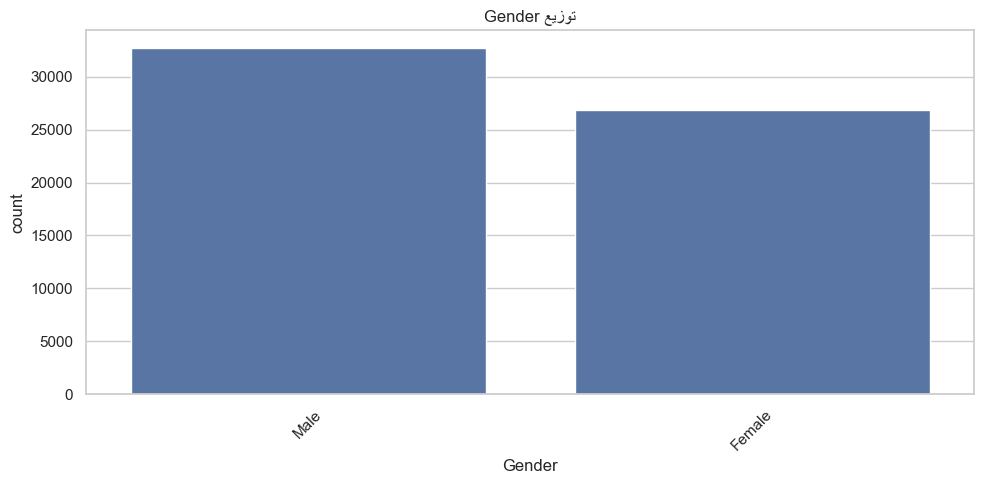

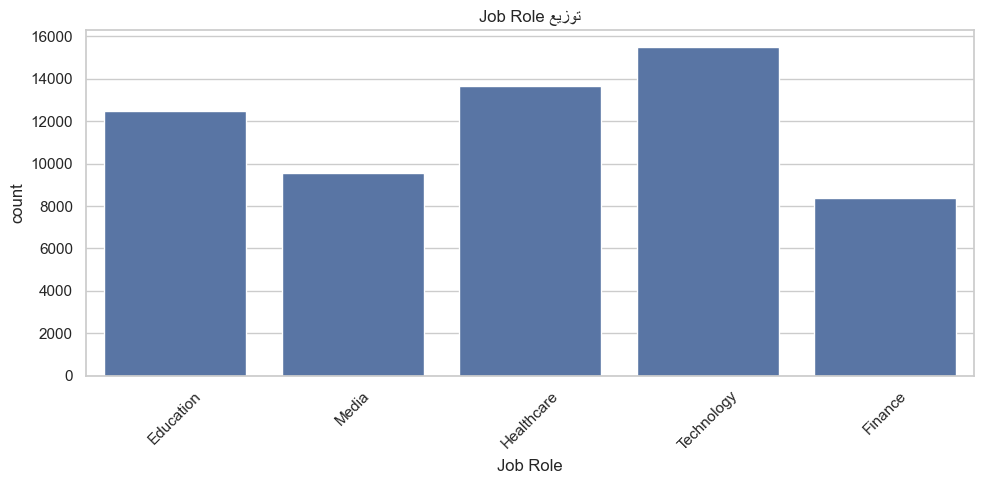

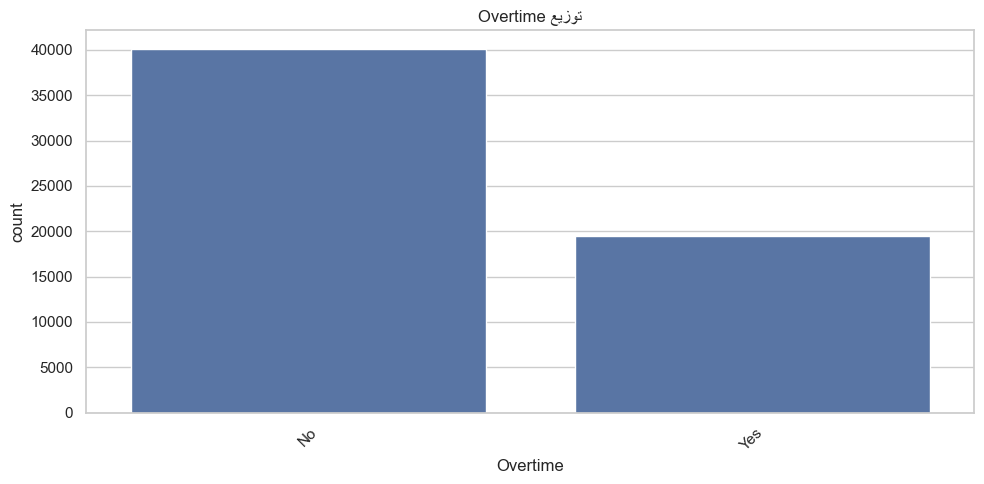

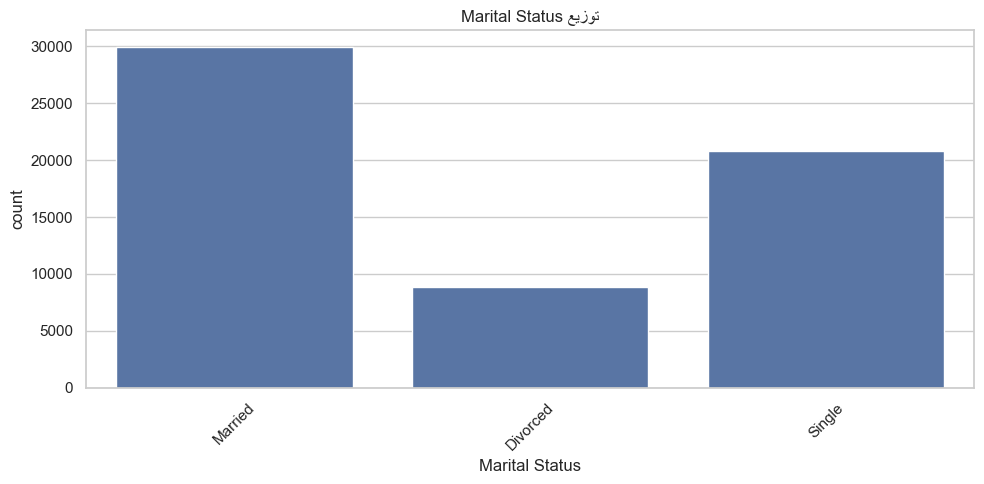

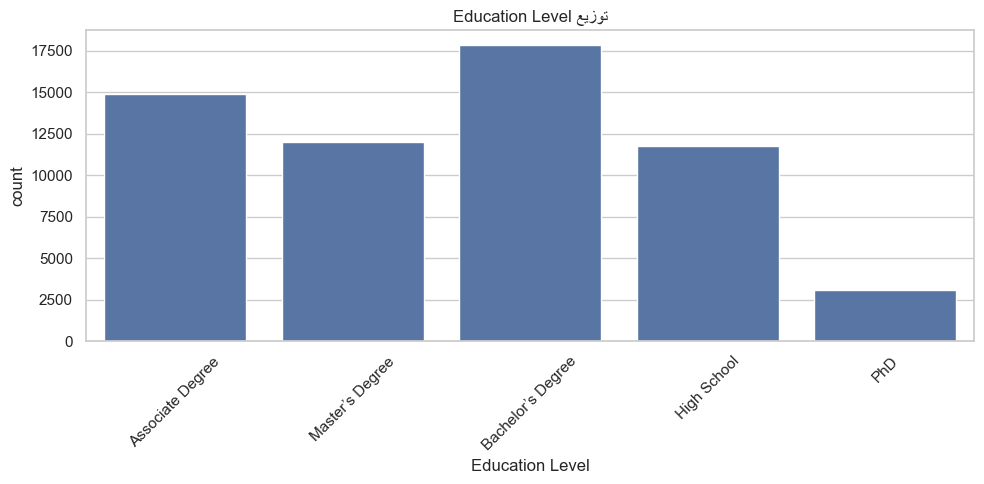

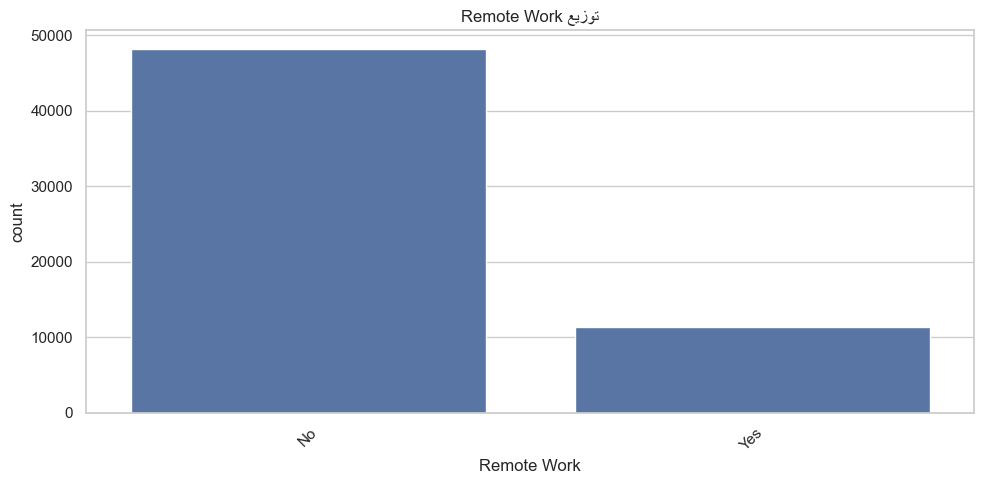

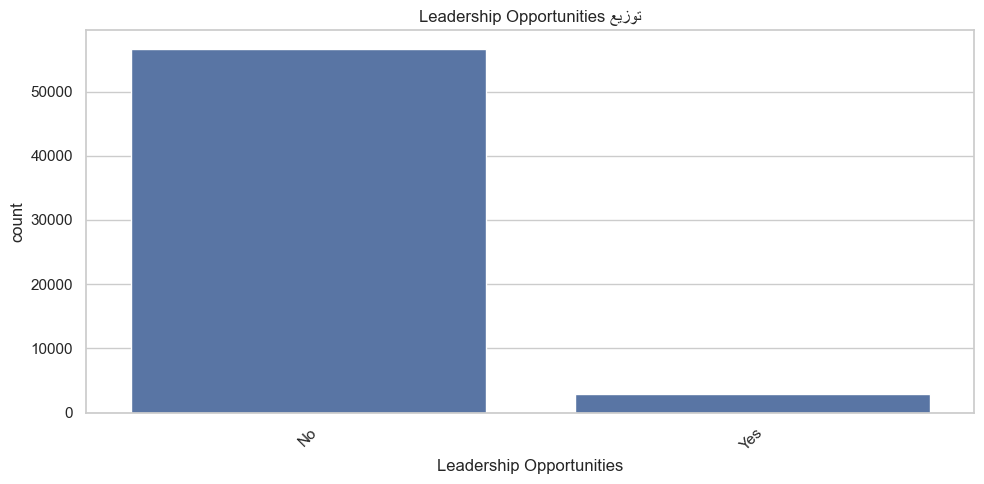

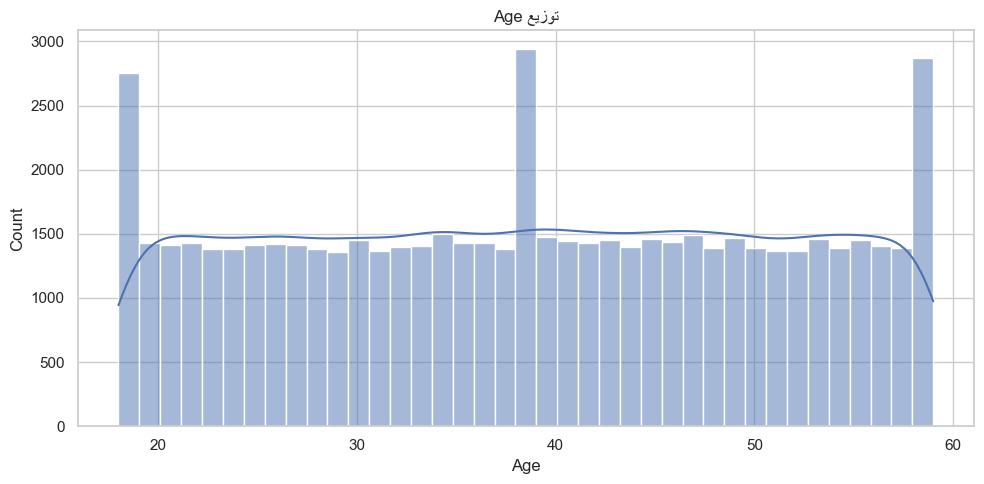

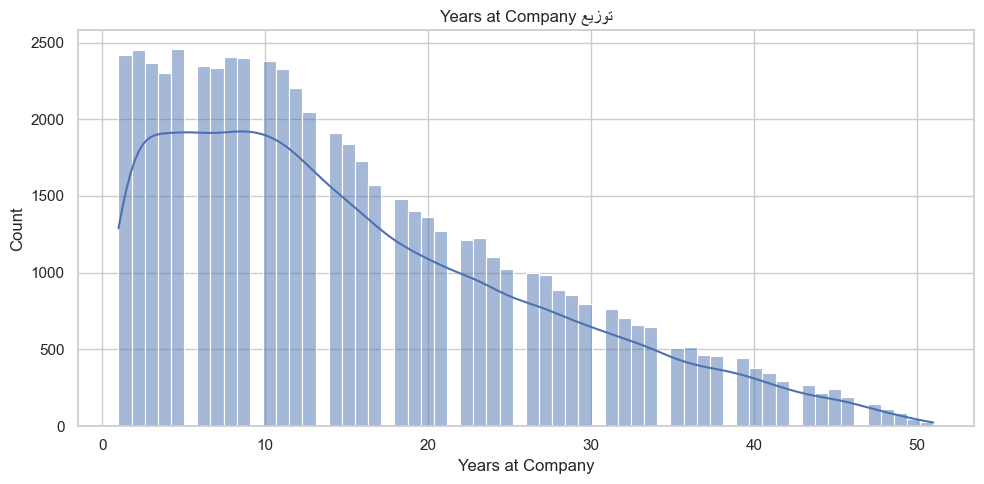

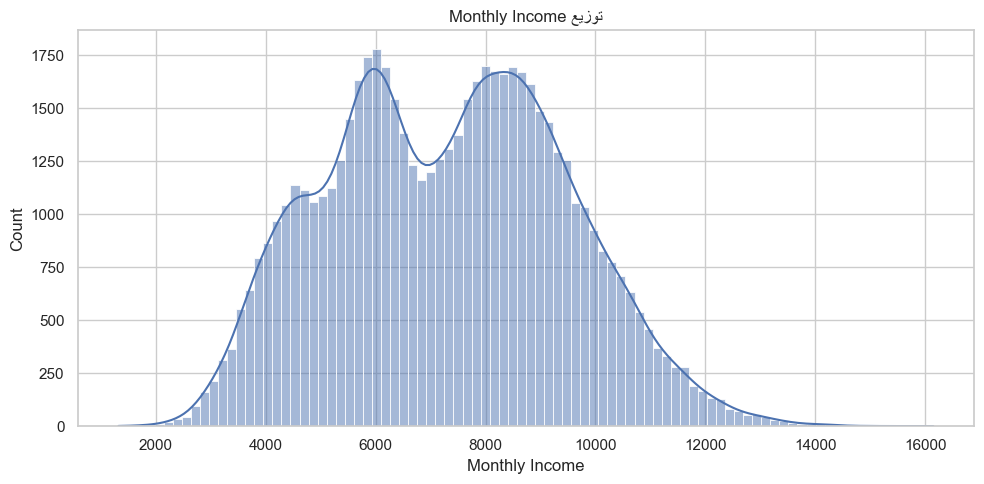

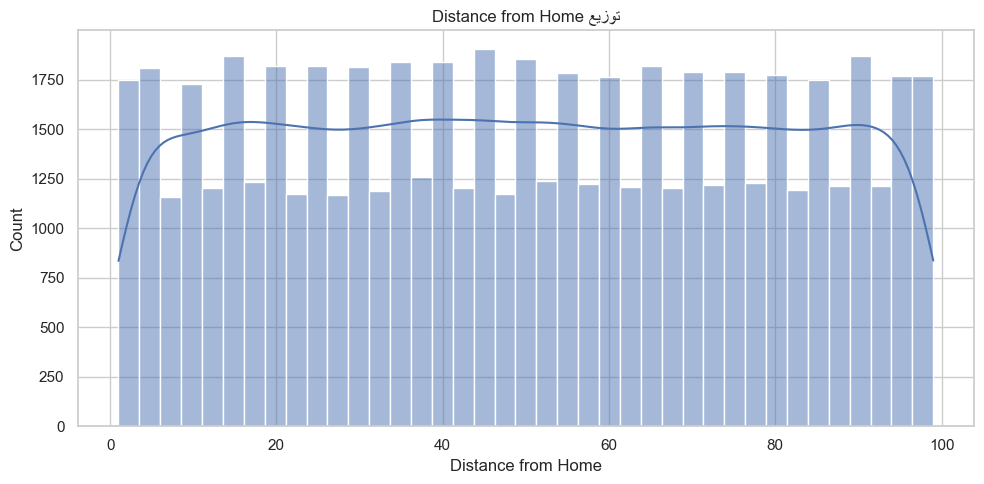

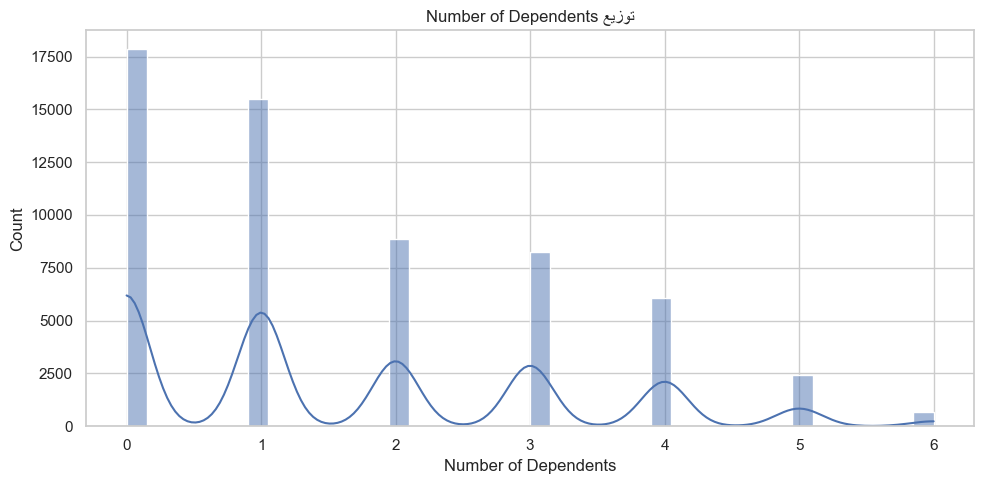

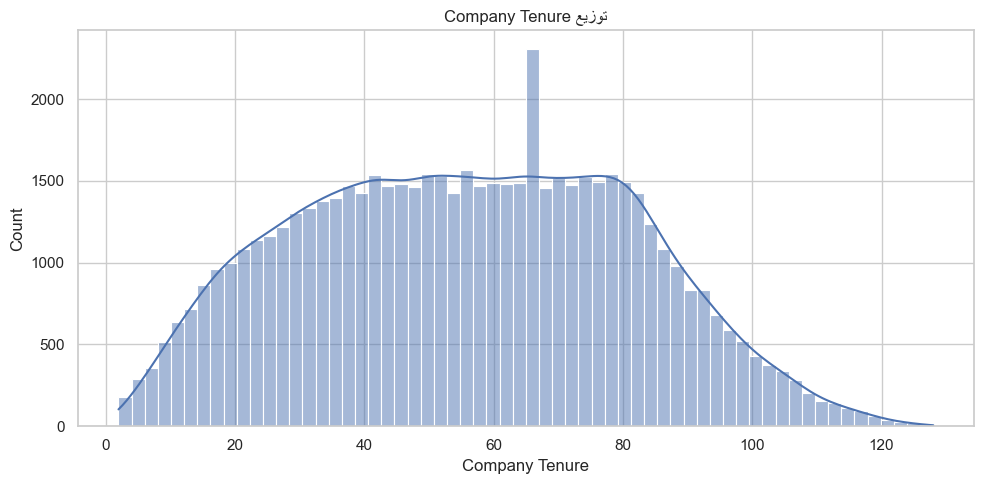

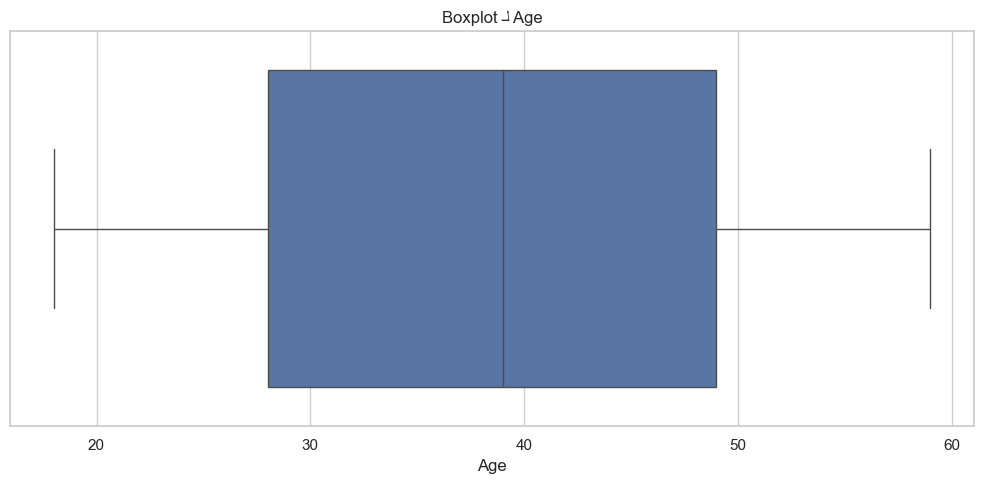

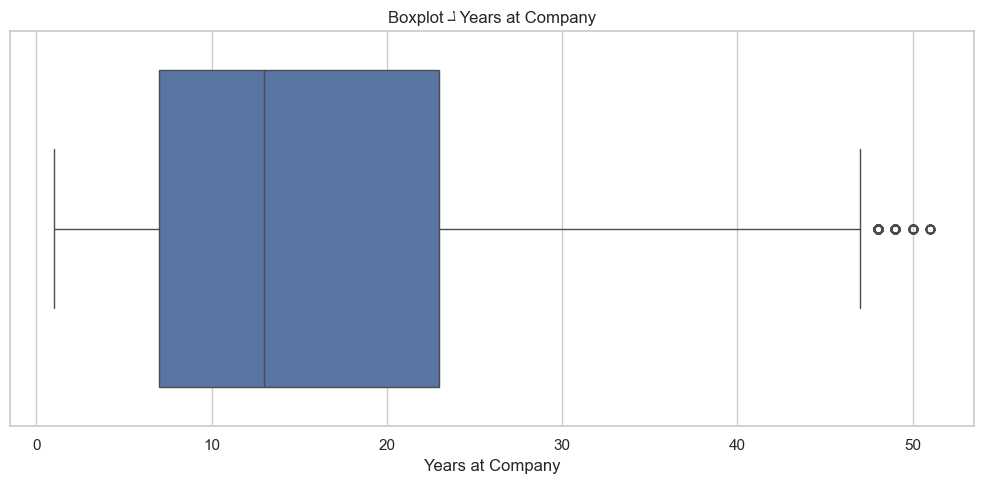

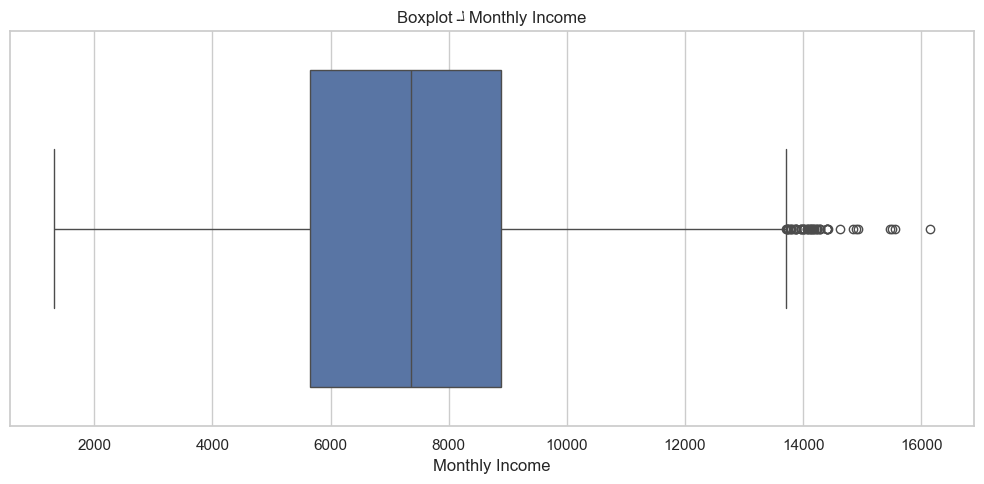

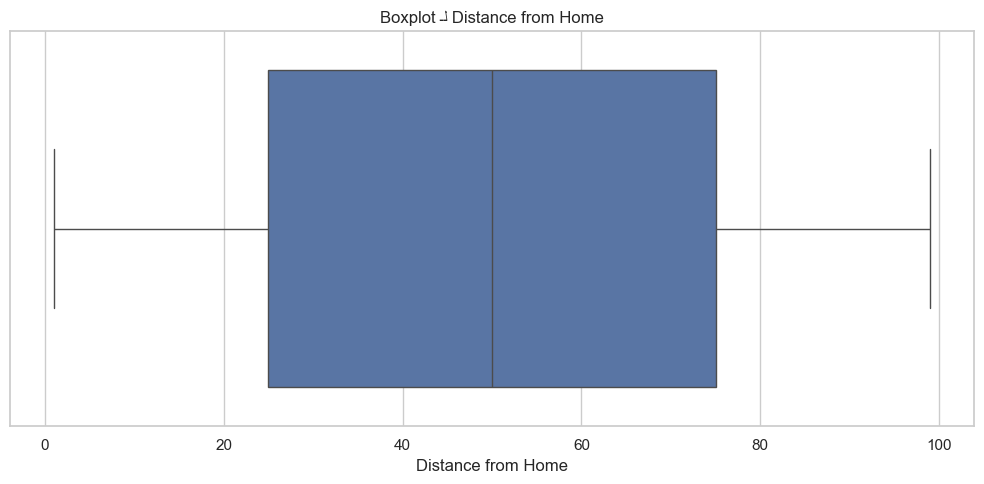

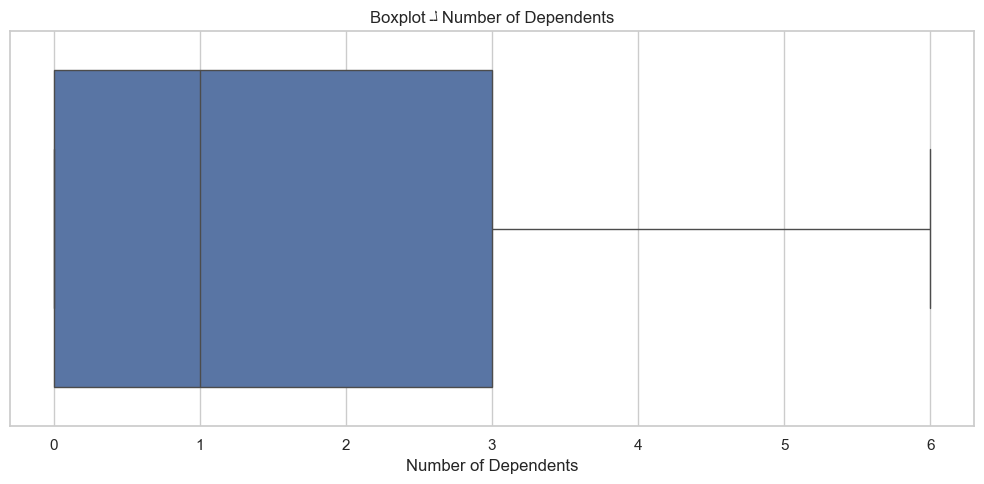

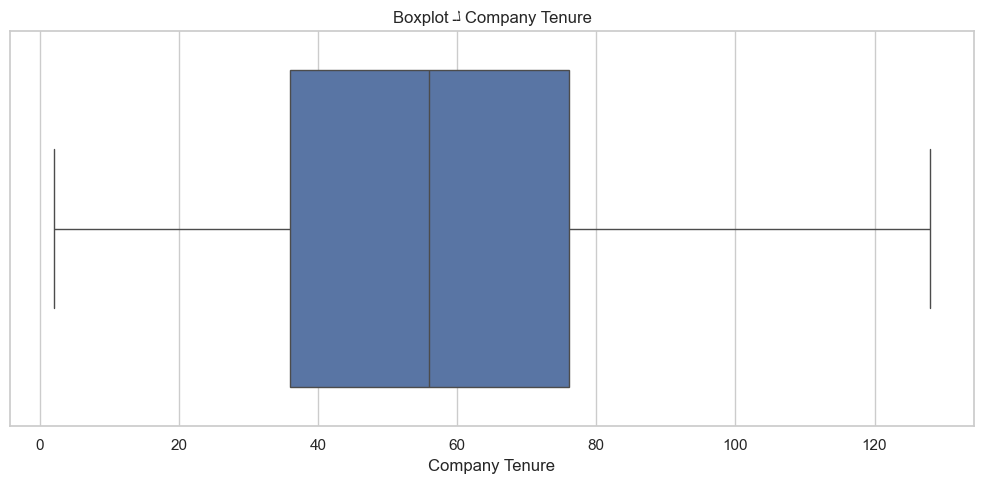

In [11]:
import arabic_reshaper
from bidi.algorithm import get_display

# إعدادات عامة
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# دالة لتعديل النص العربي
def fix_arabic(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# الأعمدة
categorical_cols = ['Gender', 'Job Role', 'Overtime', 'Marital Status',
                    'Education Level', 'Remote Work', 'Leadership Opportunities']

numerical_cols = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
                  'Number of Dependents', 'Company Tenure']

# ---------- 1. Countplots للفئوية ----------
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(fix_arabic(f"توزيع {col}"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------- 2. Histograms للرقمية ----------
for col in numerical_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(fix_arabic(f"توزيع {col}"))
    plt.tight_layout()
    plt.show()

# ---------- 3. Boxplots للرقمية ----------
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(fix_arabic(f"Boxplot لـ {col}"))
    plt.tight_layout()
    plt.show()



In [12]:
# الأعمدة النصية فقط
cat_columns = df.select_dtypes(include='object').columns
print(cat_columns)


Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_columns:
    df[col]= le.fit_transform(df[col])

In [14]:
with pd.option_context('display.max_columns', None):
    display(df.head())  # أو print(df.head())

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,0,22,0,1,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,0,21,3,0,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,0,11,1,1,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,0,27,2,2,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,1,71,2,0,0,2,1,68,0,0,0,1,2,1


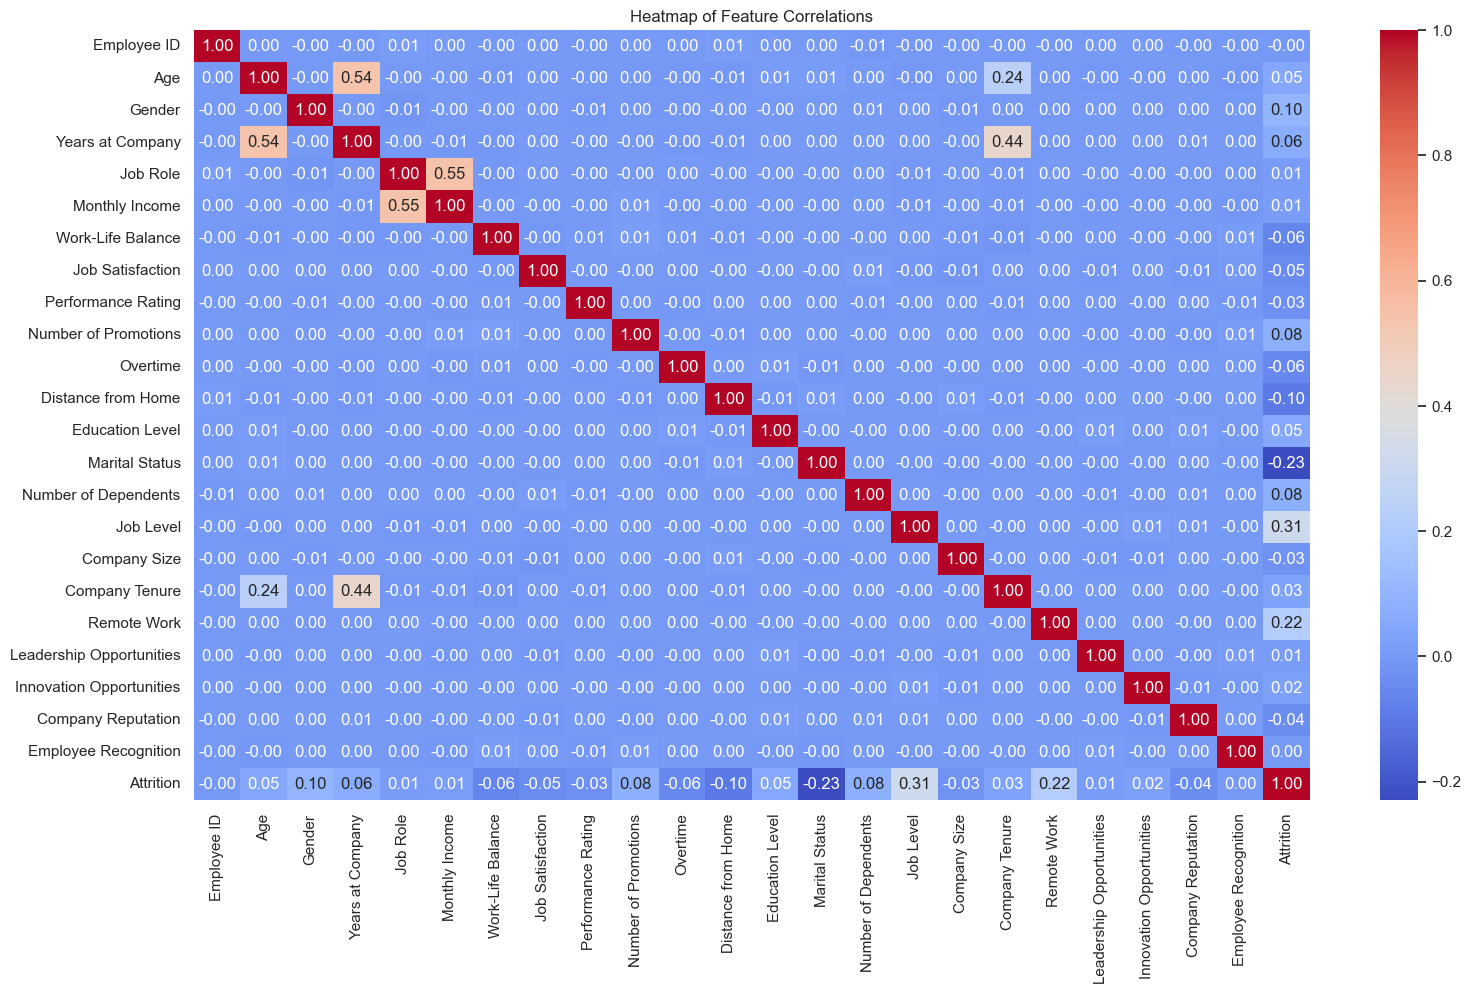

In [15]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' , fmt='.2f' )
plt.title("Heatmap of Feature Correlations")
plt.show()


## تقسيم البيانات (Train/Test Split)

In [17]:
from sklearn.model_selection import train_test_split
x = df[['Age','Gender','Years at Company','Work-Life Balance','Job Satisfaction','Distance from Home','Marital Status','Job Level','Remote Work']]
y = df['Attrition']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## بناء نموذج 

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
def evaluate_classification(Y_test, Y_pred, y_proba=None):
    """
    تقييم نماذج التصنيف الأساسي
    """
    print('الدقة (Accuracy):', accuracy_score(Y_test, Y_pred))
    print('\nمصفوفة الارتباك:\n', confusion_matrix(Y_test, Y_pred))
    print('\nتقرير التصنيف:\n', classification_report(Y_test, Y_pred))
evaluate_classification(Y_test,Y_pred)

الدقة (Accuracy): 0.7001677852348993

مصفوفة الارتباك:
 [[3907 1760]
 [1814 4439]]

تقرير التصنيف:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69      5667
           1       0.72      0.71      0.71      6253

    accuracy                           0.70     11920
   macro avg       0.70      0.70      0.70     11920
weighted avg       0.70      0.70      0.70     11920



In [21]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
xgb_preds = xgb_model.predict(X_test)
evaluate_classification(Y_test,xgb_preds)

الدقة (Accuracy): 0.7239093959731544

مصفوفة الارتباك:
 [[4015 1652]
 [1639 4614]]

تقرير التصنيف:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      5667
           1       0.74      0.74      0.74      6253

    accuracy                           0.72     11920
   macro avg       0.72      0.72      0.72     11920
weighted avg       0.72      0.72      0.72     11920



## تحسين XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],          # عدد الأشجار (كل ما زاد ممكن يحسن الأداء لكن يزيد وقت التدريب)
    'max_depth': [3, 5, 7],                  # عمق كل شجرة (كل ما زاد ممكن يفهم تعقيدات أكتر بس ممكن يبالغ)
    'learning_rate': [0.01, 0.1, 0.2]        # معدل التعلم (صغير = تعلم أبطأ بس أدق)
}

# نستخدم GridSearchCV للتجريب واختيار الأفضل
grid_search = GridSearchCV(
    estimator=xgb_model,            # الموديل
    param_grid=param_grid,    # الشبكة اللي فوق
    scoring='accuracy',       # مقياس الأداء (accuracy)
    cv=3,                     # عدد مرات التقسيم (cross-validation = 3-fold)
    verbose=1,                # علشان نتابع التقدم في التدريب
    n_jobs=-1                 # استخدم كل الأنوية المتاحة في الجهاز (تسريع)
)

#  تدريب الموديل بأفضل بارامترات
grid_search.fit(X_train,Y_train)

#  أفضل نتيجة وأفضل بارامترات
print(f" أفضل دقة: {grid_search.best_score_:.2f}")
print(" أفضل بارامترات:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
 أفضل دقة: 0.73
 أفضل بارامترات: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # يمكن تعديل sampling_strategy
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

# إعادة تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, Y_train_resampled)
xgb_preds = xgb_model.predict(X_test_resampled)
evaluate_classification(Y_test_resampled,xgb_preds)

الدقة (Accuracy): 0.7209837048885335

مصفوفة الارتباك:
 [[3735 1326]
 [1465 3477]]

تقرير التصنيف:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      5061
           1       0.72      0.70      0.71      4942

    accuracy                           0.72     10003
   macro avg       0.72      0.72      0.72     10003
weighted avg       0.72      0.72      0.72     10003



In [26]:
param_grid = {
    'n_estimators': [50, 100, 150],          # عدد الأشجار (كل ما زاد ممكن يحسن الأداء لكن يزيد وقت التدريب)
    'max_depth': [3, 5, 7],                  # عمق كل شجرة (كل ما زاد ممكن يفهم تعقيدات أكتر بس ممكن يبالغ)
    'learning_rate': [0.01, 0.1, 0.2]        # معدل التعلم (صغير = تعلم أبطأ بس أدق)
}

# نستخدم GridSearchCV للتجريب واختيار الأفضل
grid_search = GridSearchCV(
    estimator=xgb_model,            # الموديل
    param_grid=param_grid,    # الشبكة اللي فوق
    scoring='accuracy',       # مقياس الأداء (accuracy)
    cv=3,                     # عدد مرات التقسيم (cross-validation = 3-fold)
    verbose=1,                # علشان نتابع التقدم في التدريب
    n_jobs=-1                 # استخدم كل الأنوية المتاحة في الجهاز (تسريع)
)

#  تدريب الموديل بأفضل بارامترات
grid_search.fit(X_train_resampled,Y_train_resampled)

#  أفضل نتيجة وأفضل بارامترات
print(f" أفضل دقة: {grid_search.best_score_:.2f}")
print(" أفضل بارامترات:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
 أفضل دقة: 0.74
 أفضل بارامترات: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [27]:
# استخدام أفضل المعاملات من GridSearchCV
best_params = grid_search.best_params_

# إعادة تدريب النموذج مع أفضل المعاملات
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, Y_train)

# إجراء التنبؤات
y_pred_best = best_model.predict(X_test)

# تقييم النموذج
from sklearn.metrics import  accuracy_score,confusion_matrix, classification_report, roc_auc_score, f1_score
print("Accuracy:", accuracy_score(Y_test, y_pred_best))

# مصفوفة الالتباس
cm = confusion_matrix(Y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# AUC-ROC
auc_roc = roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {auc_roc}")

# F1-Score
f1 = f1_score(Y_test, y_pred_best)
print(f"F1-Score: {f1}")

# تقرير التصنيف
print("Classification Report:\n", classification_report(Y_test, y_pred_best))


Accuracy: 0.7320469798657718
Confusion Matrix:
 [[4023 1644]
 [1550 4703]]
AUC-ROC: 0.8196624646109518
F1-Score: 0.7465079365079365
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      5667
           1       0.74      0.75      0.75      6253

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920



In [28]:
import joblib

# حفظ النموذج
joblib.dump(best_model, 'best_model.pkl')

# تحميل النموذج لاحقًا
model = joblib.load('best_model.pkl')


In [29]:
# label_encoder_verification.py

print("="*50)
print("LabelEncoder Transformation Verification")
print("="*50 + "\n")

# البيانات الأصلية
categories = {
    "Gender": ["Male", "Female", "Male", "Female"],
    "Marital_Status": ["Single", "Married", "Divorced", "Single"],
    "Remote_Work": ["Yes", "No", "Yes", "Yes"]
}

# تهيئة Encoders
encoders = {
    "Gender": LabelEncoder().fit(categories["Gender"]),
    "Marital_Status": LabelEncoder().fit(categories["Marital_Status"]),
    "Remote_Work": LabelEncoder().fit(categories["Remote_Work"])
}

# طباعة جداول المقارنة
for col in categories:
    print(f"\n{'-'*30}")
    print(f"Column: {col}")
    print(f"{'-'*30}")
    
    # إنشاء DataFrame للمقارنة
    comparison = pd.DataFrame({
        "Original": categories[col],
        "Encoded": encoders[col].transform(categories[col])
    })
    
    print(comparison.to_string(index=False))
    print("\nEncoding Scheme:")
    print(pd.DataFrame({
        "Value": encoders[col].classes_,
        "Code": range(len(encoders[col].classes_))
    }).to_string(index=False))
    
print("\n" + "="*50)
print("Verification Complete!")
print("="*50)

LabelEncoder Transformation Verification


------------------------------
Column: Gender
------------------------------
Original  Encoded
    Male        1
  Female        0
    Male        1
  Female        0

Encoding Scheme:
 Value  Code
Female     0
  Male     1

------------------------------
Column: Marital_Status
------------------------------
Original  Encoded
  Single        2
 Married        1
Divorced        0
  Single        2

Encoding Scheme:
   Value  Code
Divorced     0
 Married     1
  Single     2

------------------------------
Column: Remote_Work
------------------------------
Original  Encoded
     Yes        1
      No        0
     Yes        1
     Yes        1

Encoding Scheme:
Value  Code
   No     0
  Yes     1

Verification Complete!
